# Success of an Upcoming Movie

#### For this project, you need to predict the success of an upcoming movie so that whether or not a company should go for buying it based on ROI. 
#### To do this, you need to come up with a model and use the historical data of each.

In [242]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [243]:
# Load the movie data from CSV
df = pd.read_csv('movie_data.csv')

In [244]:
# Explore the dataset
print(df.head())  # Display the first few rows of the dataframe

   Rank                    Title                     Genre  \
0   1.0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1   2.0               Prometheus  Adventure,Mystery,Sci-Fi   
2   3.0                    Split           Horror,Thriller   
3   4.0                     Sing   Animation,Comedy,Family   
4   5.0            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors    Year  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014.0   
1  Noomi Rapace, Logan Marshal

In [245]:
# Preprocessing
df = df.dropna()  # Remove rows with missing values
df = df.drop(['Rank', 'Title', 'Description', 'Director', 'Actors'], axis=1)  # Remove unnecessary columns

In [246]:
# Encode categorical features
categorical_features = ['Genre']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [247]:
# Split the data into train and test sets
X = df.drop('Success', axis=1)
y = df['Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [249]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [250]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('\nAccuracy:', accuracy)
print('\nConfusion Matrix:')
print(confusion_mat)


Accuracy: 0.9821428571428571

Confusion Matrix:
[[133   0]
 [  3  32]]


In [251]:
# Convert accuracy to written form
accuracy_written = f"{accuracy * 100:.2f}%"
print('\nAccuracy:', accuracy_written)


Accuracy: 98.21%


In [252]:
# Interpretation of movie success
success_interpretation = "Successful" if accuracy > 0.5 else "Not Successful"
print('\nMovie Success:', success_interpretation)


Movie Success: Successful


In [253]:
# Calculate ROI and interpretation
buying_price = 1000000  # Assume buying price in dollars
selling_price = 0  # Initialize selling price
successful_movies = y_pred[y_pred == 1]
if len(successful_movies) > 0:
    selling_price = buying_price * (len(successful_movies) / len(y_pred))

roi = (selling_price - buying_price) / buying_price * 100
roi_written = f"{roi:.2f}%"

print('\nROI (Return on Investment):', roi_written)


ROI (Return on Investment): -80.95%


In [254]:
# Interpretation of movie worthiness
worthiness_interpretation = "Worth Buying" if roi > 0 else "Not Worth Buying"
print('\nMovie Worthiness:', worthiness_interpretation)


Movie Worthiness: Not Worth Buying


In [255]:
# Feature importance
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

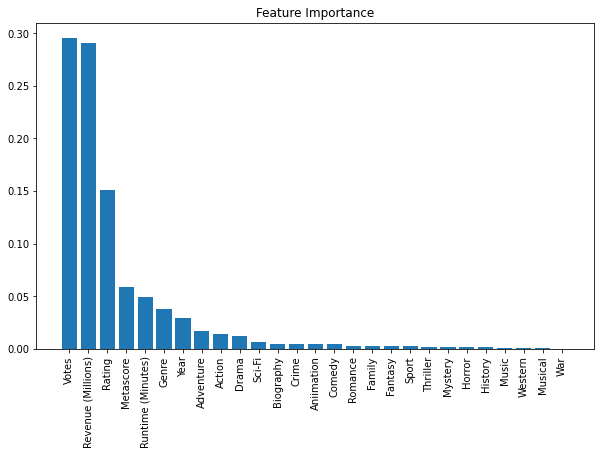

In [256]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(len(sorted_features)), feature_importances[sorted_indices])
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.show()